In [ ]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import imutils
cv2.ocl.setUseOpenCL(False)

In [ ]:
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call("pip install -U opencv-python".split())
    subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/left.jpg".split())
    subprocess.call("wget https://raw.githubusercontent.com/YoniChechik/AI_is_Math/master/c_08_features/right.jpg".split())


In [ ]:
b1=cv2.imread('foto2A.jpeg',0)
b2=cv2.imread('foto2B.jpeg',0)
b3=cv2.imread('foto2A.jpeg')
b4=cv2.imread('foto2B.jpeg')
c1=cv2.imread('foto3A.jpeg',0)
c2=cv2.imread('foto3B.jpeg',0)
c3=cv2.imread('foto3A.jpeg')
c4=cv2.imread('foto3B.jpeg')
d1=cv2.imread('foto4A.jpeg',0)
d2=cv2.imread('foto4B.jpeg',0)
d3=cv2.imread('foto4A.jpeg')
d4=cv2.imread('foto4B.jpeg')
e1=cv2.imread('foto5A.jpeg',0)
e2=cv2.imread('foto5B.jpeg',0)
e3=cv2.imread('foto5A.jpeg')
e4=cv2.imread('foto5B.jpeg')


In [ ]:
descriptor = cv2.ORB_create()

In [ ]:
kpsb1,featuresb1 = descriptor.detectAndCompute(b1,None)
kpsb2,featuresb2 = descriptor.detectAndCompute(b2,None)
kpsc1,featuresc1 = descriptor.detectAndCompute(c1,None)
kpsc2,featuresc2 = descriptor.detectAndCompute(c2,None)
kpsd1,featuresd1 = descriptor.detectAndCompute(d1,None)
kpsd2,featuresd2 = descriptor.detectAndCompute(d2,None)
kpse1,featurese1 = descriptor.detectAndCompute(e1,None)
kpse2,featurese2 = descriptor.detectAndCompute(e2,None)


In [ ]:
#test1 = cv2.drawKeypoints(a1, kpsa1, None, color=(0,255,255))
#test2=cv2.drawKeypoints(a2, kpsa2, None, color=(0,255,255))
#as this is not neccesary for last image i wont do this in this collab

In [ ]:
#cv2_imshow(test1)
#cv2_imshow(test2)


In [ ]:
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [ ]:
matchesb = bf.match(featuresb1,featuresb2)
rawMatchesb = sorted(matchesb, key = lambda x:x.distance)
print("Raw matches (Brute force):", len(rawMatchesb))


Raw matches (Brute force): 238


In [ ]:
matchesc = bf.match(featuresc1,featuresc2)
rawMatchesc = sorted(matchesc, key = lambda x:x.distance)
print("Raw matches (Brute force):", len(rawMatchesc))


Raw matches (Brute force): 201


In [ ]:
matchesd = bf.match(featuresd1,featuresd2)
rawMatchesd = sorted(matchesd, key = lambda x:x.distance)
print("Raw matches (Brute force):", len(rawMatchesd))


Raw matches (Brute force): 185


In [ ]:
matchese = bf.match(featurese1,featurese2)
rawMatchese = sorted(matchese, key = lambda x:x.distance)
print("Raw matches (Brute force):", len(rawMatchese))


Raw matches (Brute force): 83


In [ ]:
#img3 = cv2.drawMatches(a3,kpsa1,a4,kpsa2,matches[:10],
                         #  None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
#plt.figure(figsize=(20,10))
#plt.imshow(img3),plt.show()

In [ ]:
def getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh):
    # convert the keypoints to numpy arrays
    kpsA = np.float32([kp.pt for kp in kpsA])
    kpsB = np.float32([kp.pt for kp in kpsB])
    
    if len(matches) > 4:

        # construct the two sets of points
        ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
        
        # estimate the homography between the sets of points
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,
            reprojThresh)

        return (matches, H, status)
    else:
        return None

In [ ]:
Mb = getHomography(kpsb1, kpsb2, featuresb1, featuresb2, matchesb, reprojThresh=4)
if Mb is None:
    print("Error!")
(matchesb, Hb, statusb) = Mb
print(Hb)

[[ 1.00195555e+00 -1.51475621e-03  4.63049065e+02]
 [ 2.32083210e-04  9.99832278e-01  2.51398949e-02]
 [ 3.54528858e-06 -1.19103442e-06  1.00000000e+00]]


In [ ]:
Mc = getHomography(kpsc1, kpsc2, featuresc1, featuresc2, matchesc, reprojThresh=4)
if Mc is None:
    print("Error!")
(matchesc, Hc, statusb) = Mc
print(Hc)

[[ 9.87659747e-01 -2.29050488e-02  3.32270953e+01]
 [ 1.62838120e-02  9.78034416e-01 -1.28394379e+02]
 [ 2.95614865e-06 -4.80832574e-05  1.00000000e+00]]


In [ ]:
Md = getHomography(kpsd1, kpsd2, featuresd1, featuresd2, matchesd, reprojThresh=4)
if Md is None:
    print("Error!")
(matchesd, Hd, statusd) = Md
print(Hd)

[[ 1.23258359e+00  1.14874722e+00 -2.36826861e+02]
 [-1.11403483e+00  1.22974184e+00  2.08557969e+02]
 [ 1.12051846e-04  6.72570124e-05  1.00000000e+00]]


In [ ]:
Me = getHomography(kpse1, kpse2, featurese1, featurese2, matchese, reprojThresh=4)
if Me is None:
    print("Error!")
(matchesb, He, statusb) = Me
print(He)

[[ 1.00148967e+00 -6.19610056e-02  3.80903877e+01]
 [ 6.30902293e-02  9.98586416e-01  9.15401702e+01]
 [ 3.74475849e-07  2.01900973e-05  1.00000000e+00]]


In [ ]:
def result(a3,a4,H):
   width = a3.shape[1] + a4.shape[1]
   height = a3.shape[0] + a4.shape[0]

   result = cv2.warpPerspective(a3, H, (width, height))
   result[0:a4.shape[0], 0:a4.shape[1]] = a4
   return result
resultb=result(b3,b4,Hb)
resultc=result(c3,c4,Hc)
resultd=result(d3,d4,Hd)
resulte=result(e3,e4,He)




In [ ]:
def final(result):
     gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
     thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

     cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
     cnts = imutils.grab_contours(cnts)


     c = max(cnts, key=cv2.contourArea)

     (x, y, w, h) = cv2.boundingRect(c)


     result = result[y:y + h, x:x + w]
     return result

resultb=final(resultb)
resultc=final(resultc)
resultd=final(resultd)
resulte=final(resulte)



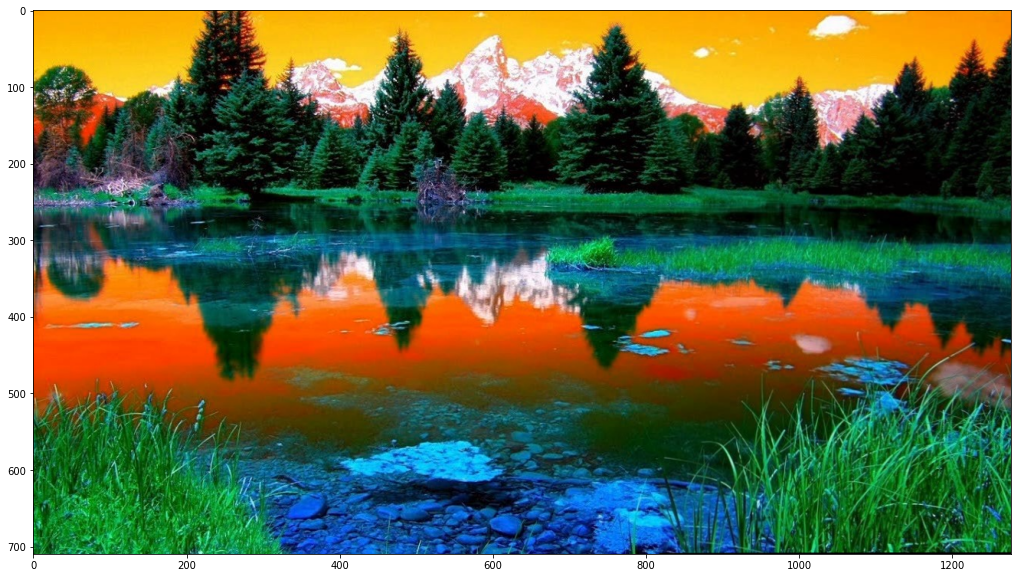

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(resultb)

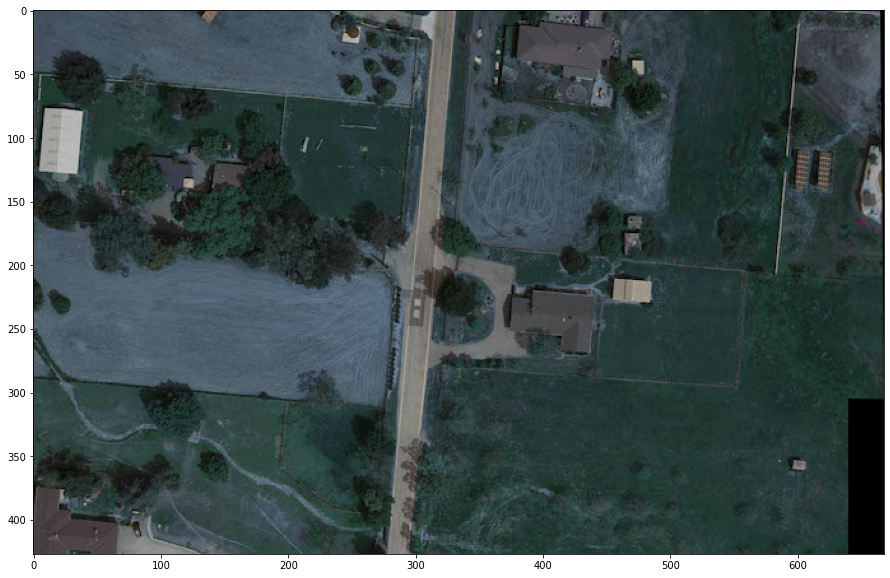

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(resultc)

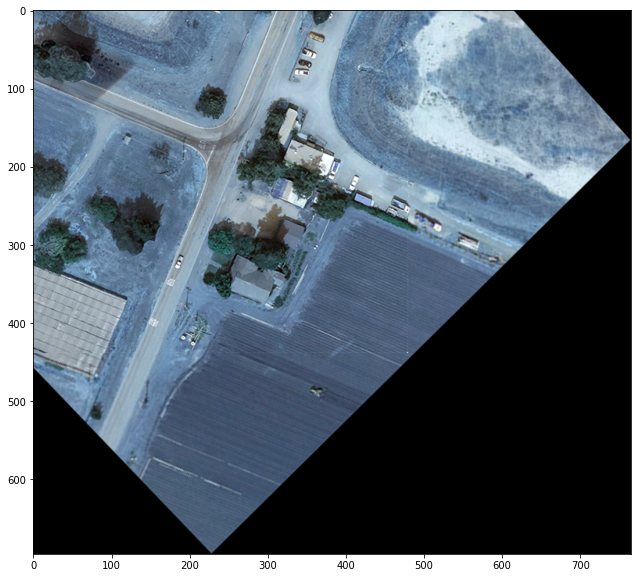

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(resultd)

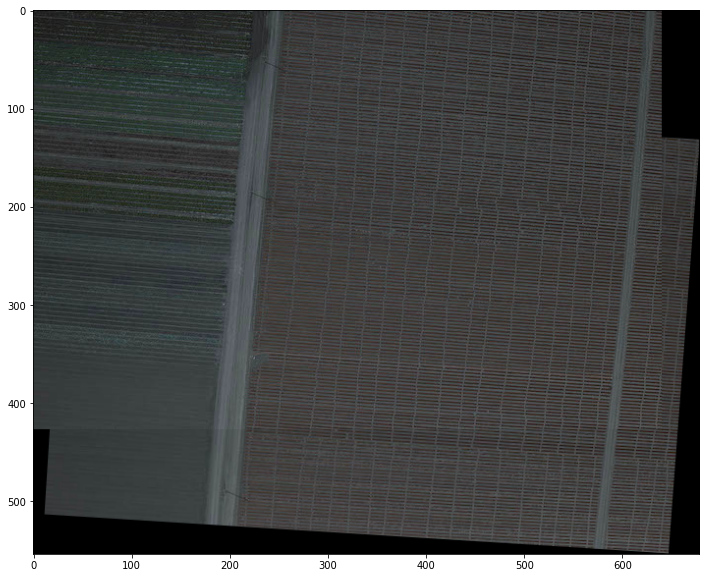

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(resulte)